## 1. Cities in Sweden - create dataset (*) 

In [539]:
import pandas as pd
cities = pd.DataFrame({"Kommun":("Malmö", "Stockholm", "Uppsala", "Göteborg"), "Population":(347949, 975551, 233839, 583056)})
cities["Kommun"]

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

In [540]:
cities[cities["Kommun"] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [541]:
cities = cities.sort_values(by="Population", ascending=False)
cities

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [542]:
cities.head(3)

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


In [543]:
cities["Population %"] = cities["Population"] / 10379295 * 100
cities

,Kommun,Population,Population %
1,Stockholm,975551,9.399010
3,Göteborg,583056,5.617491
0,Malmö,347949,3.352338
2,Uppsala,233839,2.252937


## 2. Cities in Sweden - real dataset

In [544]:
df = pd.read_excel("Data/komtopp50_2020.xlsx", "Totalt")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring


In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    object 
 1   Unnamed: 1  291 non-null    float64
 2   Unnamed: 2  291 non-null    object 
 3   Unnamed: 3  292 non-null    object 
 4   Unnamed: 4  291 non-null    float64
 5   Unnamed: 5  292 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.0+ KB


In [546]:
df.describe()

,Unnamed: 1,Unnamed: 4
count,291.000000,291.000000
mean,151.934708,35496.934708
std,138.092769,74190.464321
min,1.000000,2019.000000
25%,73.500000,10005.000000
50%,146.000000,15940.000000
75%,218.500000,35649.500000
max,2019.000000,974073.000000


In [547]:
df = df[6:].reset_index(drop=True)      # removes the rows with unuseful data and resets the index numbers
df.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]     # renames all columns
df

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074
...,...,...,...,...,...,...
285,54,55.0,Österåker,46644,45574.0,2.34783
286,116,115.0,Östhammar,22251,22250.0,0.004494
287,160,159.0,Östra Göinge,15017,15007.0,0.066636
288,284,284.0,Överkalix,3289,3315.0,-0.784314


In [548]:
df = df.sort_values(by="Folkmängd 2020", ascending=False)
df

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1.0,Stockholm,975551,974073.0,0.151734
57,2,2.0,Göteborg,583056,579281.0,0.65167
134,3,3.0,Malmö,347949,344166.0,1.099179
241,4,4.0,Uppsala,233839,230767.0,1.331213
124,5,5.0,Linköping,164616,163051.0,0.959822
...,...,...,...,...,...,...
271,286,286.0,Åsele,2805,2794.0,0.393701
5,287,287.0,Arjeplog,2718,2785.0,-2.405745
29,288,288.0,Dorotea,2498,2551.0,-2.077617
194,289,289.0,Sorsele,2442,2489.0,-1.888309


In [549]:
df.tail()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
271,286,286.0,Åsele,2805,2794.0,0.393701
5,287,287.0,Arjeplog,2718,2785.0,-2.405745
29,288,288.0,Dorotea,2498,2551.0,-2.077617
194,289,289.0,Sorsele,2442,2489.0,-1.888309
12,290,290.0,Bjurholm,2387,2408.0,-0.872093


In [550]:
twothousandtwentie = df["Folkmängd 2020"].sum()
twothousandnineteen = df["Folkmängd 2019"].sum().astype(int)
print(f"Population 2020: {twothousandtwentie}")
print(f"Population 2019: {twothousandnineteen}")


Population 2020: 10379295
Population 2019: 10327589


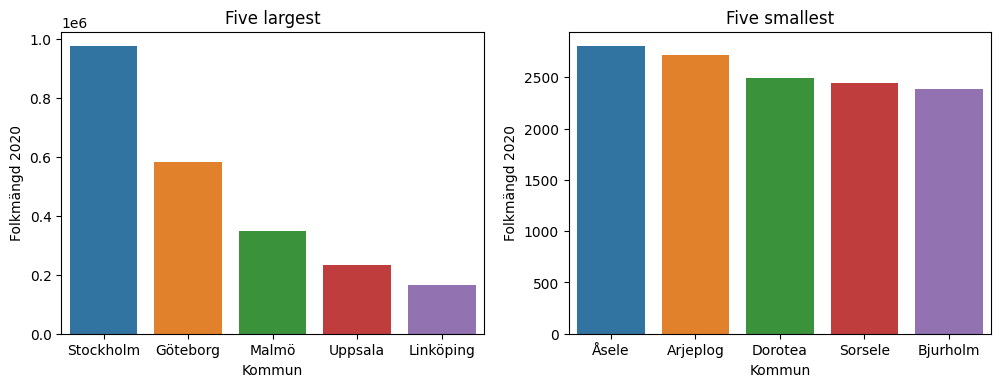

In [551]:
import seaborn as sns
import matplotlib.pyplot as plt

five_largest = df.head()
five_smallest = df.tail()

fig, ax = plt.subplots(1, 2, dpi=100, figsize=(12, 4))
sns.barplot(data=five_largest, x=five_largest["Kommun"], y=five_largest["Folkmängd 2020"], ax=ax[0])
ax[0].title.set_text("Five largest")
sns.barplot(data=five_smallest, x=five_smallest["Kommun"], y=five_smallest["Folkmängd 2020"], ax=ax[1])
ax[1].title.set_text("Five smallest")


## 3. Cities in Sweden - gender

In [552]:
men = pd.read_excel("Data/komtopp50_2020.xlsx", "Män")
women = pd.read_excel("Data/komtopp50_2020.xlsx", "Kvinnor")

def clean(df, gender):
    new_df = df[6:].reset_index(drop=True)
    new_df.columns = ["Rang 2020", "Rang 2019", "Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
    new_df["Kön"] = gender
    return new_df

men = clean(men, "Man")
women = clean(women, "Kvinna")
women.loc[women["Kommun"] == "Piteå", "Förändring"] = 0

In [553]:
both = pd.concat([women, men]).set_index("Kommun").drop(["Rang 2020", "Rang 2019"], 1)
# both

C:\Users\chris\AppData\Local\Temp/ipykernel_13108/1132782591.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  both = pd.concat([women, men]).set_index("Kommun").drop(["Rang 2020", "Rang 2019"], 1)


In [554]:
total = df[["Folkmängd 2020", "Folkmängd 2019", "Förändring", "Kommun"]].set_index("Kommun")
total.columns = ["Total Pop 2020", "Total Pop 2019", "Total förändring"]
total

,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,
Stockholm,975551,974073.0,0.151734
Göteborg,583056,579281.0,0.65167
Malmö,347949,344166.0,1.099179
Uppsala,233839,230767.0,1.331213
Linköping,164616,163051.0,0.959822
...,...,...,...
Åsele,2805,2794.0,0.393701
Arjeplog,2718,2785.0,-2.405745
Dorotea,2498,2551.0,-2.077617


In [555]:
data = pd.concat([both, total.reindex(both.index)], axis=1).sort_values(by="Total Pop 2020", ascending=False)
data.head()

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Stockholm,492569,491853.0,0.145572,Kvinna,975551,974073.0,0.151734
Stockholm,482982,482220.0,0.158019,Man,975551,974073.0,0.151734
Göteborg,290551,288973.0,0.546072,Kvinna,583056,579281.0,0.65167
Göteborg,292505,290308.0,0.756782,Man,583056,579281.0,0.65167
Malmö,175411,173543.0,1.07639,Kvinna,347949,344166.0,1.099179


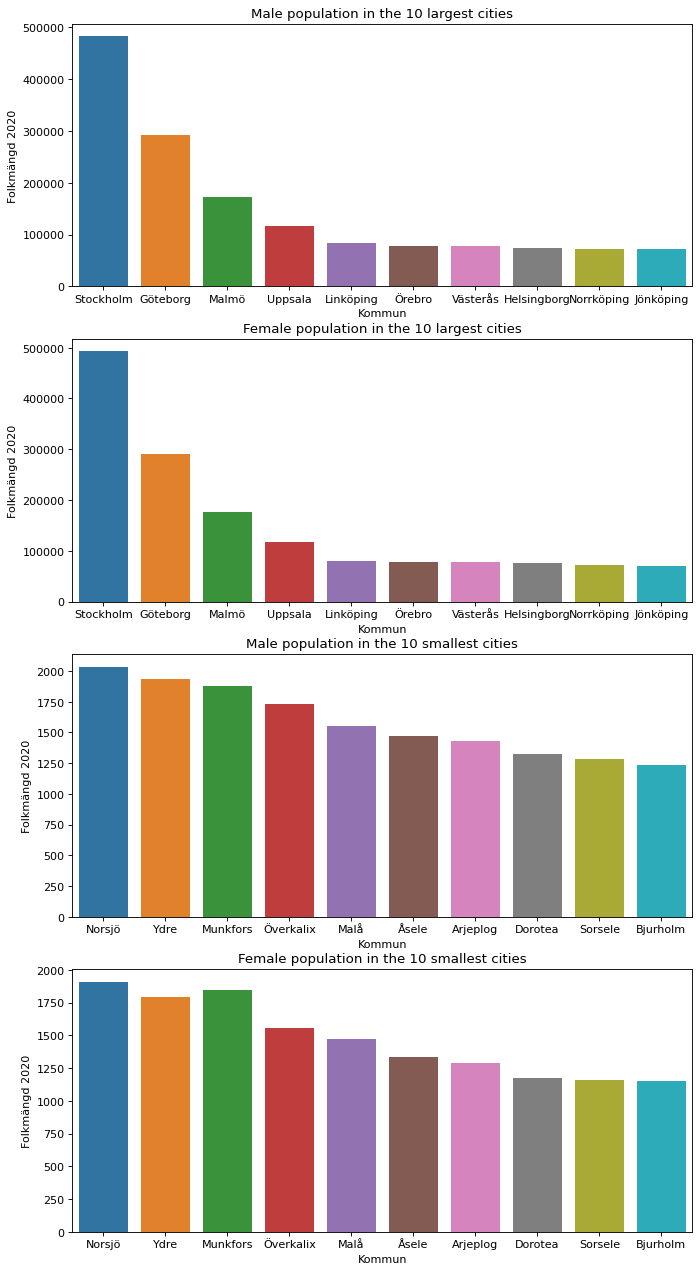

In [556]:
ten_largest_men = data[data["Kön"] == "Man"].head(10)
ten_smallest_men = data[data["Kön"] == "Man"].tail(10)
ten_largest_women = data[data["Kön"] == "Kvinna"].head(10)
ten_smallest_women = data[data["Kön"] == "Kvinna"].tail(10)

fig, ax = plt.subplots(4, 1, dpi=80, figsize=(10, 20))
sns.barplot(data = ten_largest_men, x = ten_largest_men.index, y = "Folkmängd 2020", ax=ax[0])
ax[0].title.set_text("Male population in the 10 largest cities")
sns.barplot(data = ten_smallest_men, x = ten_smallest_men.index, y = "Folkmängd 2020", ax=ax[2])
ax[2].title.set_text("Male population in the 10 smallest cities")
sns.barplot(data = ten_largest_women, x = ten_largest_women.index, y = "Folkmängd 2020", ax=ax[1])
ax[1].title.set_text("Female population in the 10 largest cities")
sns.barplot(data = ten_smallest_women, x = ten_smallest_women.index, y = "Folkmängd 2020", ax=ax[3])
ax[3].title.set_text("Female population in the 10 smallest cities")

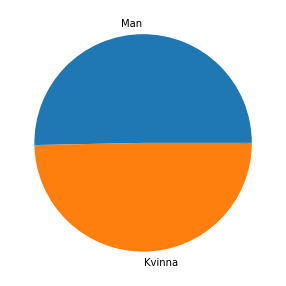

In [557]:
gender_population = [data["Folkmängd 2020"][data["Kön"] == "Man"].sum(), data["Folkmängd 2020"][data["Kön"] == "Kvinna"].sum(),]
labels = ["Man", "Kvinna"]

fig = plt.figure(figsize=(10, 5))
plt.pie(x = gender_population, labels=labels)

plt.show()

[Text(0, 0.5, 'Percentage (%)'),
 Text(0.5, 1.0, 'Difference in gender population 2020')]

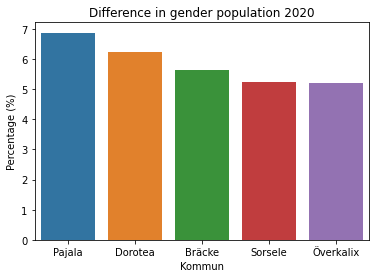

In [608]:
women = data["Folkmängd 2020"][data["Kön"] == "Kvinna"] / data["Total Pop 2020"][data["Kön"] == "Kvinna"]
men = data["Folkmängd 2020"][data["Kön"] == "Man"] / data["Total Pop 2020"][data["Kön"] == "Man"]
diff = abs(women - men) * 100
diff = diff.sort_values(ascending=False).head()
fig, ax = plt.subplots()
sns.barplot(x = diff.index, y = diff)
ax.set(ylabel = "Percentage (%)", title = "Difference in gender population 2020")

[Text(0, 0.5, 'Growth'), Text(0.5, 1.0, 'Population growth from 2019 to 2020')]

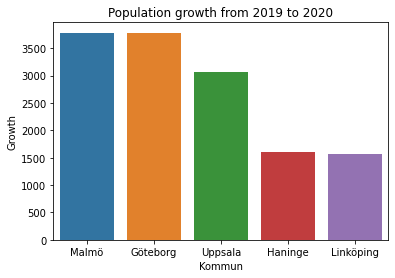

In [629]:
growth = (data["Total Pop 2020"][data["Kön"] == "Man"] - data["Total Pop 2019"][data["Kön"] == "Man"]).sort_values(ascending=False).head()

fig, ax = plt.subplots()
sns.barplot(x = growth.index, y = growth)
ax.set(ylabel = "Growth", title = "Population growth from 2019 to 2020")